## MIDAS Torch

In [87]:
pip install gradio
pip install timm

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\negis\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\negis\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=2cda565adbcc20e6571df367daeb8fd3a64a7b6dcbfb331c92a7dd916f9e044a
  Stored in directory: c:\users\negis\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3372 sha256=d2caf9e4214e09d0c4bed2b494756690be37848c45d46a1a3aefb70874adce00
  Stored in directory: c:\users\negis\appdata\local\pip\cache\wheels\40\0b\05\607940155598cf002272cafb7c7616cdecfc458dbf4f9a5676
Successfully built ffmpy flask-cachebuster


## Libraries

In [131]:
import cv2
import torch
import urllib.request
torch.cuda.empty_cache()

In [113]:
import matplotlib.pyplot as plt

## Importing images

In [114]:
url,filename=("https://raw.githubusercontent.com/Negi97Mohit/Pytorch-MIDAS/main/img/dogs.jpg", "dogs.jpg")
urllib.request.urlretrieve(url,filename)


('dogs.jpg', <http.client.HTTPMessage at 0x18957a78cd0>)

In [115]:
model_type="DPT_Large"

In [116]:
midas=torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\negis/.cache\torch\hub\intel-isl_MiDaS_master


## Using CPU if CUDA is present

In [125]:
device=torch.device("cpu") if  torch.device("cpu") else torch.cuda.is_available()
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
            (dro

In [126]:
midas_transform=torch.hub.load("intel-isl/MiDaS", "transforms")

Using cache found in C:\Users\negis/.cache\torch\hub\intel-isl_MiDaS_master


## Midas transform based on the model type 

In [127]:
if model_type=="DTP_Large" or model_type=="DTP_Hybrid":
    transform=midas_transform.dtp_tranform
else:
    transform=midas_transform.small_transform

In [128]:
img=cv2.imread("dogs.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
input_batch=transform(img).to(device)
midas.to(device)

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
            (dro

## Prediction

In [129]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

## Output

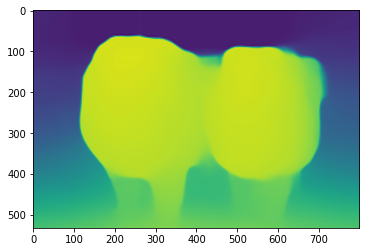

In [130]:
plt.imshow(output)